In [ ]:
# CIFAR-10 이미지 분류

# CIFAR-10 데이터셋 (Canadian Institute For Advanced Research)은 일반적으로 이미지 분류 학습에 많이
# 사용되는 이미지셋으로, 머신러닝이나 컴퓨터 비전 알고리즘을 연구에 가장 널리 사용되는 데이터셋 중
# 하나이다.

# CIFAR-10 데이터셋에는 10개의 서로 다른 레이블로 구성되어 있으며, 60,000개의 32x32 컬러 이미지가
# 포함되어 있다.
# 10개의 레이블에는 airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck 이 있다.
# CIFAR-10 데이터셋은 32 x 32 크기 이미지인 50,000개의 학습용 데이터, 10,000개의 테스트용 데이터,
# 총 60,000개의 32 x 32 크기의 이미지로 구성되어 있다.

# 앞에서 다루었던 MNIST 이미지는 흑백이었지만, CIFAR-10 은 컬러 이미지이기 때문에 이미지의 복잡도는
# 크게 증가된다.

170500096/170498071 [==============================] - 2s 0us/step


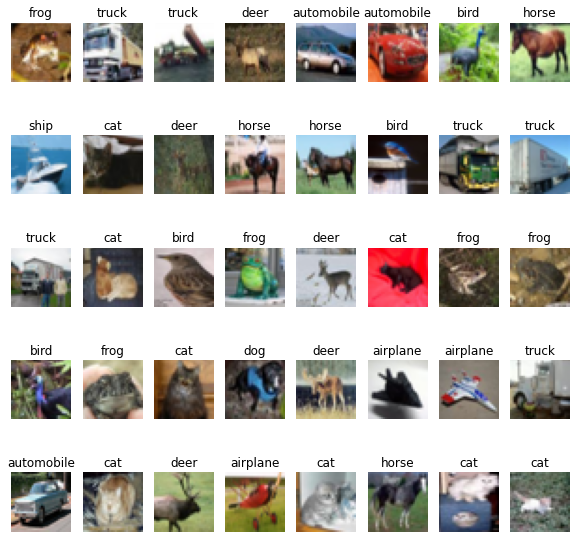

In [2]:
# CIFAR-10 이미지 불러오기

from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# cifar10 데이터 읽어오기
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 10개의 레이블
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,10))     # 그래프 크기 설정

for i in range(0, 40):  # 40장 이미지 출력
  im = x_train[i]       # 이미지: 배열로 처리
  plt.subplot(5, 8, i+1)  # 5행 8열로 배치
  plt.title(labels[y_train[i][0]])  # 이미지의 레이블을 title 설정
  plt.axis('off')       # x축, y축 라벨 출력안함
  plt.imshow(im)
plt.show()


Epoch 1/20
1563/1563 [==============================] - 18s 11ms/step - loss: 1.8825 - accuracy: 0.3297 - val_loss: 1.7112 - val_accuracy: 0.3988
Epoch 2/20
1563/1563 [==============================] - 18s 11ms/step - loss: 1.7090 - accuracy: 0.3905 - val_loss: 1.6650 - val_accuracy: 0.4024
Epoch 3/20
1563/1563 [==============================] - 18s 11ms/step - loss: 1.6460 - accuracy: 0.4134 - val_loss: 1.6813 - val_accuracy: 0.3972
Epoch 4/20
1563/1563 [==============================] - 18s 12ms/step - loss: 1.6006 - accuracy: 0.4324 - val_loss: 1.5785 - val_accuracy: 0.4371
Epoch 5/20
1563/1563 [==============================] - 18s 12ms/step - loss: 1.5769 - accuracy: 0.4381 - val_loss: 1.5954 - val_accuracy: 0.4266
Epoch 6/20
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5464 - accuracy: 0.4513 - val_loss: 1.5816 - val_accuracy: 0.4294
Epoch 7/20
1563/1563 [==============================] - 18s 11ms/step - loss: 1.5291 - accuracy: 0.4553 - val_loss: 1.5324 -

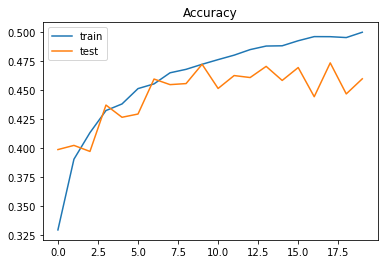

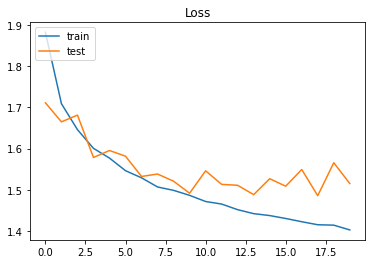

In [17]:
# 다층 퍼셉트론(MLP) 알고리즘으로 CIFAR-10 이미지 분류

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import tensorflow as tf
import matplotlib.pyplot as plt

num_classes = 10
im_rows = 32
im_cols = 32
im_size = im_rows*im_cols*3

# cifar10 데이터 읽어오기
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 데이터를 1차원 배열로 변환하기
x_train = x_train.reshape(-1, im_size).astype('float32')/255
x_test = x_test.reshape(-1, im_size).astype('float32')/255

# 레이블 데이터를 one-hot 형식으로 변환하기
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# 모델 정의하기
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(im_size,)))
model.add(Dense(10, activation='softmax'))      # 다중 분류: 10개의 클래스

# 모델 컴파일하기
model.compile(loss='categorical_crossentropy',  # 손실 함수: 다중 분류
              optimizer='adam',
              metrics=['accuracy'])

# 모델 학습 실행하기
hist = model.fit(x_train, y_train,    
                 batch_size=32,     # 배치크기: 50000개의 이미지를 32개로 나눠서 학습
                 epochs=20,          # 학습횟수: 20회
                 verbose=1,         # 학습 진행동 화살표 출력
                 validation_data=(x_test, y_test))
# 모델 평가하기
score = model.evaluate(x_test, y_test)
print('정답률=', score[1], 'loss=', score[0])                

# 학습 상태를 그래프로 그리기
# train 데이터와 test 데이터의 accuracy 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')   # 메인 타이틀: Accuracy
plt.legend(['train','test'], loc='upper left')    # 범례: 왼쪽 위에 출력
plt.show()

# train 데이터와 test 데이터의 loss 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')       # 메인 타이틀: Loss
plt.legend(['train', 'test'], loc='upper left')   # 범례: 왼쪽 위에 출력
plt.show()

# 다층 퍼셉트론(MLP) 알고리즘으로 CIFAR-10이미지 분류 결과
# 정답률이 굉장히 낮은 결과를 보여 주고 있다.


Epoch 1/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5123 - accuracy: 0.4480 - val_loss: 1.1319 - val_accuracy: 0.5924
Epoch 2/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1058 - accuracy: 0.6047 - val_loss: 0.9652 - val_accuracy: 0.6557
Epoch 3/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9458 - accuracy: 0.6653 - val_loss: 0.8578 - val_accuracy: 0.7003
Epoch 4/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8585 - accuracy: 0.6980 - val_loss: 0.7931 - val_accuracy: 0.7289
Epoch 5/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7977 - accuracy: 0.7204 - val_loss: 0.7743 - val_accuracy: 0.7385
Epoch 6/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7479 - accuracy: 0.7386 - val_loss: 0.7187 - val_accuracy: 0.7496
Epoch 7/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7044 - accuracy: 0.7518 - val_loss: 0.7026 - val_accuracy:

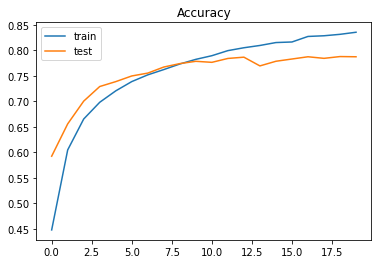

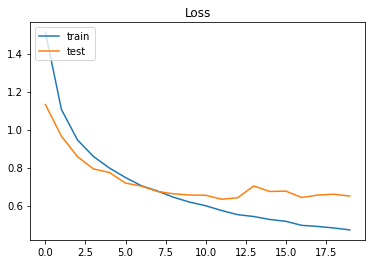

In [2]:
# CNN알고리즘으로 CIFAR-10 이미지 분류

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import tensorflow as tf
import matplotlib.pyplot as plt

num_classes = 10
im_rows = 32
im_cols = 32
in_shape = (im_rows, im_cols, 3)

# 1. 데이터셋 생성하기
# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 데이터를 정규화하기
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# 레이블 데이터를 One-hot 형식으로 변환하기
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# 2. 모델 구성하기
model = Sequential()

# 컨볼루션 레이어
model.add(Conv2D(32, (3,3), padding='same', input_shape=in_shape))    # 출력 이미지 사이즈가 입력 이미지 사이즈와 동일
model.add(Activation('relu'))
model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))

# 맥스 풀링 레이저
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))            # 25%의 노드를 랜덤하게 끄는 코드

# 컨볼루션 레이어
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))

# 맥스 풀링 레이어
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 전결합층
model.add(Flatten())          # 2차원 데이터를 1차워 데이터로 변환
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))       # 50%의 노드를 랜덤하게 끄는 코드
model.add(Dense(num_classes)) # 다중 분류: 10개의 클래스
model.add(Activation('softmax'))

# 3. 모델 컴파일하기
model.compile(loss='categorical_crossentropy',    # 손실 함수: 다중분류
              optimizer='adam',
              metrics=['accuracy'])

# 4. 모델 실행하기
hist = model.fit(x_train, y_train,
                 batch_size=32,       # 배치크기: 50000개의 이미지를 32개로 나눠서 학습
                 epochs=20,           # 학습횟수: 20회
                 verbose=1,           # 학습 진행도 화살표 출력
                 validation_data=(x_test, y_test))

# 5. 모델 평가하기
score = model.evaluate(x_test, y_test, verbose=1)
print('정답률=', score[1], 'loss=',score[0])

# 6. 학습 상태를 그래프로 그리기
# train 데이터와 test 데이터의 accuracy 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy') # 메인 타이틀 : Accuracy
plt.legend(['train', 'test'], loc='upper left') # 범례 : 왼쪽 위에 출력
plt.show()

# train 데이터와 test 데이터의 loss 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss') # 메인 타이틀 : Accuracy
plt.legend(['train', 'test'], loc='upper left') # 범례 : 왼쪽 위에 출력
plt.show()

# 7. 학습한 모델 저장하기
model.save('/content/drive/My Drive/Colab Notebooks/cifar10_cnn.h5')        # 학습된 모델 저장

# CNN 알고리즘으로 CIFAR-10 이미지 분류 결과





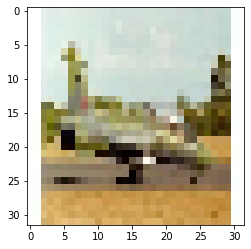

1/1 [==============================] - 0s 3ms/step
airplane = 100
automobile = 0
bird = 0
cat = 0
deer = 0
dog = 0
frog = 0
horse = 0
ship = 0
truck = 0
------------------------------
예측한 결과= airplane


In [6]:
# 저장한 모델파일을 이용해서 이미지를 분류하기
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# 학습된 모델 파일 읽어오기
model = load_model('/content/drive/My Drive/Colab Notebooks/cifar10_cnn.h5')

# 10개의 레이블
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# openCV를 사용해서 예측할 이미지 읽어오기
im = cv2.imread('/content/drive/My Drive/workspace-total/workspace-python/2020_07_29_t2/image_0001.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (32, 32))
plt.imshow(im)
plt.show()

# 이미지 예측하기
r=model.predict(np.array([im]), batch_size=32, verbose=1)
res=r[0]

# 예측 결과 출력
for i, acc in enumerate(res):
  print(labels[i], '=', int(acc*100))
print('------------------------------')
print('예측한 결과=', labels[res.argmax()])

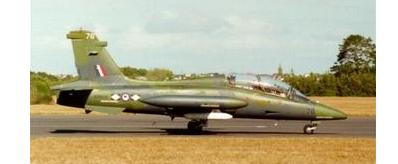

원본 이미지